***HierarchicalClustering***

->Hierarchical clustering is a type of unsupervised machine learning algorithm used to group similar objects into clusters. 

->It builds a hierarchy of clusters, which can be represented in a tree-like diagram known as a dendrogram.
    
->Once the hierarchical clustering algorithm has been applied and the dendrogram has been created, you can use the dendrogram to decide the number of
clusters.

->Cutting the dendrogram: 

->By "cutting" the dendrogram at a certain level (height), you can define the number of clusters.
    
->The height at which you cut the dendrogram determines how fine or coarse the clustering will be.

->Example Steps:

->Perform hierarchical clustering on your dataset.

->Plot the dendrogram to visualize the hierarchical structure.

->Decide where to "cut" the dendrogram. This cutting point corresponds to a distance threshold, and everything below this threshold is grouped together as a cluster.

  Assign data points to clusters based on where the dendrogram is cut.

***Agglomerative Hierarchical Clustering (Bottom-Up Approach)***

-> In agglomerative hierarchical clustering, the algorithm starts with each data point as a separate cluster and then repeatedly merges the closest pairs of clusters until all points are part of a single cluster.

***Divisive Hierarchical Clustering (Top-Down Approach)***

->Divisive hierarchical clustering is the opposite of agglomerative clustering. It starts with all data points in a single cluster and recursively splits the clusters into smaller sub-clusters.

***Divisive Hierarchical Clustering without using pandas***

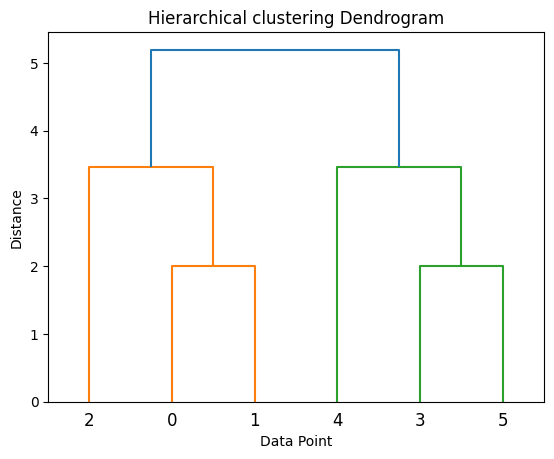

In [8]:
# Example for divisive clustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
x=np.array([[1,2],[1,4],[1,0],
            [4,2],[4,4],[4,0]])
z=linkage(x,'ward')# ward Distance
dendrogram(z)# plotting dendrogram
plt.title('Hierarchical clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()

***Agglomerative Hierarchical Clustering without pandas***

In [24]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
X=np.array([[1,2],[1,4],[1,0],
          [4,2],[4,4],[4,0]])
clustering=AgglomerativeClustering(n_clusters=2).fit(X)
print(clustering.labels_)

[1 1 1 0 0 0]


***Agglomerative Hierarchical Clustering with pandas***

In [66]:
#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
# Load the dataset
df = pd.read_csv("marketing_campaign1.csv")  # Change this to your dataset filename
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [68]:
# Select numerical features for clustering (drop non-numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols]


In [70]:
# Handle missing values (if any)
data = data.fillna(data.mean())

In [72]:
# Standardize the data (scaling is important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [74]:
# Compute the linkage matrix for hierarchical clustering
linkage_matrix = linkage(data_scaled, method='ward')  # 'ward' minimizes variance within clusters


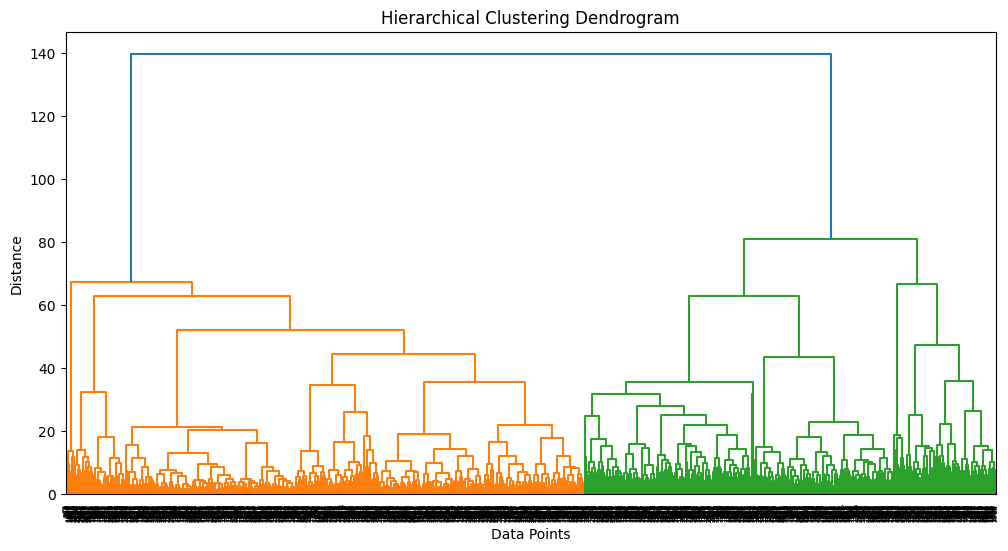

In [76]:
# Visualize the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [77]:
 #Define the number of clusters based on dendrogram observation
num_clusters = 3  # Change this based on dendrogram observation

# Apply Agglomerative Clustering
agglom_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
df["Cluster"] = agglom_clustering.fit_predict(data_scaled)

# Display first few rows with cluster labels
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  04-09-2012       58       635  ...             0             0   
1  08-03-2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3  10-02-2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("marketing_campaign1.csv")  # Change this to your dataset filename

# Select numerical features for clustering (drop non-numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols]

# Handle missing values
data = data.fillna(data.mean())

# Standardize the data (scaling is important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Function for divisive clustering (creating a linkage matrix)
def divisive_clustering(data, n_clusters=3):
    # Start with all data points in a single cluster
    clusters = [data]
    linkage_matrix = []

    # Recursively split the clusters
    current_cluster_index = 0  # Track current cluster to split
    cluster_id = len(data)  # Start unique cluster IDs
    while len(clusters) < n_clusters:
        # Split the chosen cluster into two using KMeans
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(clusters[current_cluster_index])
        labels = kmeans.labels_
        
        # Create two new clusters
        new_cluster_1 = clusters[current_cluster_index][labels == 0]
        new_cluster_2 = clusters[current_cluster_index][labels == 1]
        
        # Record the linkage for the split
        # Linkage matrix follows: [cluster1_size, cluster2_size, distance, num_original_clusters]
        distance = np.linalg.norm(np.mean(new_cluster_1, axis=0) - np.mean(new_cluster_2, axis=0))  # Distance between centroids
        linkage_matrix.append([len(new_cluster_1), len(new_cluster_2), distance, cluster_id])
        
        # Replace the original cluster with the two new clusters
        clusters[current_cluster_index] = new_cluster_1
        clusters.append(new_cluster_2)
        
        # Move to the next cluster to split
        current_cluster_index = len(clusters) - 1  # Always split the most recently created cluster
        cluster_id += 1  # Increment the unique cluster ID
    
    # Convert the linkage matrix to the correct format for plotting the dendrogram
    linkage_matrix = np.array(linkage_matrix)
    return linkage_matrix

# Apply divisive clustering
n_clusters = 3  # Desired number of clusters
linkage_matrix = divisive_clustering(data_scaled, n_clusters)

# Visualize the Dendrogram for divisive clustering
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Divisive Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


ValueError: Linkage matrix contains excessive observationsin a cluster

<Figure size 1200x600 with 0 Axes>